# INF 8215 - Intelligence artif.: méthodes et algorithmes 
## Fall 2018 - TP3 - Machine Learning

**Due date: December 6**

**Files to submit:**
    * TP3_EN.ipynb filled
    * SoftmaxClassifier.py filled
    * test_prediction.csv prediction file

## Introduction

The purpose of this lab is to give you an overview of the general course of a machine learning project while familiarizing you with adapted python libraries.


In the first part, you will implement a multi-class classification algorithm called **softmax regression** using only **numpy** library and embed it in the **scikit-learn** library.

In the second part, you will learn about the **dataset** used for this project. Moreover, you will have to perform the **preprocessing** of these data so that it can be used in conventional machine learning algorithms. To this end, you will use **pandas** and **scikit-learn** libraries.

Finally, in the third part, you will compare the efficiency of the model that you have implemented with other models already implemented in **scikit-learn**. Then you will try to improve the performance of the selected algorithm.

Once all these steps are done, you will submit your results on the **kaggle** platform.

## Installation

To install **pandas** and **scikit-learn**, the easiest way is to download and install **Anaconda**, which groups together the most used packages for scientific computing and data science.

You will find the distribution here: https://www.anaconda.com/download/#linux.

Make sure you have **scikit-learn** **20.0**.

## Bonus 1: Competition (2 points)

When you finish the lab, you can submit your predictions on **kaggle**, you will get your performance in terms of **log loss**.
You can then send me this result by email (laurent.boucaud@polymtl.ca) and join your prediction file on the test set (for verification).

A conversation in the forum will be created to keep up to date the best score obtained by one of the teams of the course.

As long as no forum is created, **do not send me your performances if they are above 0.8 of log loss**.

Once the first best score posted in the forum, **only give me your results if your log loss is lower than the previous best score**.

The number of points obtained will be proportional to the ranking of the teams.

# 1. Softmax Regression (10 points)


In this part you will implement **softmax regression**, the **logistic regression** variant which allows you to perform classification for a class number greater than 2.

The code to be completed is in the **SoftmaxClassifier.py** file.

**For this exercise, the constraint is to use only the numpy library **

## Sklearn encapsulation


The class **SoftmaxClassifier** inherits from the **BaseEstimator** and **ClassifierMixin** classes from **scikit-learn** which will allow us to easily use the tools provided by scikit-learn with our classifier later.

For compatibility, the classifier necessarily implements the methods:

* **fit**: responsible for training the model
* **predict_proba**: Predicts the probability of each class for each example in the dataset provided.
* **predict**: Predicts the class for each example in the provided dataset.
* **score**: quantifies the difference between the predicted classes and the actual classes for the dataset provided


## Train/Test set:

When one wants to test the performance of learning a machine learning algorithm, one **does not test it on the data used for learning**.

Indeed, what interests us is that our algorithm is able to generalize its predictions to the data that it has never seen.

To illustrate, if we test an algorithm on the training data, we test its ability to **learn by heart** the dataset and not to **generalize**.

Therefore, when receiving a new dataset, the first thing to do is to **split it into two parts**: a **train set** (**70-80%** of the dataset) and a **test set** (**20-30%** of the dataset).

All **data processing** and **learning algorithms** should be learned only on the training set and then applied to the test set.

By doing so, the lack of prior knowledge of the test set during training is ensured.

## Gradient descent

Gradient descent is an algorithm that allows finding the optimal solution of a certain number of problems. The principle is as follows: we define a **cost function J** that characterizes the problem.
This function depends on a set of **$\theta$** parameters. Gradient descent seeks to **minimize** the cost function by **iteratively modifying** the parameters.

### Gradient

The cost function gradient for a given $\theta$, is the direction in which $\theta$ must be modified to reduce the value of the cost function.

The cost function is minimal when the gradient is zero.

Concretely, we initialize $\theta$ randomly, and we do at each iteration a step to reduce the cost function until convergence of the algorithm to a minimum of the cost function.

### Learning rate


The learning rate represents the size of the step that will be made in the direction of the gradient.
The larger it is, the faster the convergence, but there is a risk that the algorithm will diverge.

The smaller it is, the slower the convergence.

### Batch gradient descent

There are several gradient descent algorithms. We will use Batch gradient descent.

In this algorithm, before updating $\theta$, we calculate the gradients on all the training examples.

### Epoch

This is a step of the gradient descent, a single gradient update.

### Bias/Variance tradeoff

When training a machine learning algorithm we look for a tradeoff between **bias** and **variance**.

A model with a **strong bias**, is a model that is **too simple** for the given data structure (e.g., a linear model for quadratic data), this limits the capacity of the model to generalize. We also call bias  **underfitting**.

A model with a **high variance** means that it is sensitive to small variations in training data, this corresponds to **overfitting**, i.e., the model is too close to the structure of the training set which **limits its ability to generalize**.

A model with a **significant bias** will have a **poor** performance over the **training set**.
A model with a **significant variance** will have a much worse **performance** on the entire **test set** than on the  **train set**.



### One-hot-encoding

In machine learning to represent a vector of categorical data, we use one-hot encoding.

For a vector containing 5 examples and 3 different categories, it is represented as a matrix of size 5 by 3. This matrix is entirely filled with 0 except for the index corresponding to the number of the class for each example.


For example
$ y = \left(\begin{array}{cc} 
1 \\
1 \\
2 \\
3 \\
2 \\
\end{array}\right) $

becomes:

$ yohe =  \left(\begin{array}{cc} 
1. & 0. & 0.\\
1. & 0. & 0.\\
0. & 1. & 0.\\
0. & 0. & 1.\\
0. & 1. & 0.\\
\end{array}\right) $


#### Question 1 (1 point)
Implement the **_one_hot** method in SoftmaxClassifier.py

### Weight matrix

Let $ X_{m * n} $ be the example matrix and $ \Theta _{n*K} $ the weight matrix with:

* **m** number of examples
* **n** number of features
* **k** number of target classes



It is common to add an additional column to X, this column is filled with 1. To take into account this change, we must add a line to the matrix $\Theta$.

We get X_bias$_{m*(n+1)}$ et $ \Theta _{(n+1)*K} $


Intuitively, each class K is associated with a $\theta$ column.

We denote by $\theta_k$ (n+1 dimension vector) the weight column associated with the prediction of class k .

$\Theta$ = [$\theta_0$,$\theta_1$... $\theta_k$ ... $\theta_n$ ]

Thus $ z = x * \Theta $ gives a vector of dimension K which are **logits** associated with x for each class.

#### Question 2 (1 point)

In the **fit** function in SoftmaxClassifier.py instantiate X_bias and initialize $\Theta$  randomly. (line 74)

### Softmax

We want to convert the logit vector **z** obtained in the previous part into a **probability vector**.

For this we define the **softmax function**:


$$ \hat{p_x}^k = softmax(z)_k = \frac{exp(z_k)}{\sum_{\substack{1<j<K}} exp(z_j)} $$


Intuitively, for a logit of z, $z_k$, we take the exponential of this value and divide it by the sum of the exponentials of each logit of the vector **z**. We get $\hat{p_x}^k$ the probability that the example **x** belongs to the class **k**.

The operation is repeated for each logit of the vector **z**.

We thus obtain a probability vector $\hat{p_x}$ for an example **x**.

The division makes it possible to make the sum of the terms of the vector $\hat{p_x}$ equal to 1 which is indispensable for probabilities.

#### Question 3 (1 point)
Implement  **_softmax** method in SoftmaxClassifier.py

#### Question 4 (1 point)

Using the **_ softmax** function of question 3, implement the **predict_proba** and **predict** methods in SoftmaxClassifier.py

### Fonction de coût Log loss

Let log loss (ou cross entropy) be the cost function:

$$ J( \Theta) = \frac{-1}{m}\sum_{\substack{1<i<m}} \sum_{\substack{1<k<K}} y_k^i log( \hat{p_k}^i ) $$

with:
* **K** number of classes
* **m** number of examples
* $ \hat{p_k}^i  $  probability that example i be of target class k
* $y_k^i$ is 1 if the target class of example i is k, 0 otherwise

**Implementation detail:** Cost function is not defined for probabilities taking values 0. or 1., we must ensure that given $\epsilon$, probabilities are in  [$\epsilon$, 1. - $\epsilon$].
#### Question 5 (1 point)

Implement the **_ cost_function** method in SoftmaxClassifier.py by taking into account the **implementation detail** (self.eps variable) and use it to calculate the **loss** variable in the **fit** method (line 84)

### Cost function gradient

The **gradient of J** with respect to $\theta_k$ is :


$$ \Delta_{\theta_k}J( \Theta) = \frac{1}{m} \sum_{\substack{1<i<m}}( \hat{p_k}^i - y_k^i)x^i  $$

with:
* **K** number of target classes
* **m** number of examples
* $ \hat{p_k}^i  $  probability that example i is of class k
* $y_k^i$ is 1 if example i target class is k, 0 otherwise


We can rewrite it as matrices, the **gradient of J** with respect to $\Theta$** is :
$$ \Delta_J( \Theta) = \frac{1}{m} X_{bias}^T *( \hat{p} - y_{ohe}) $$

with:

* $\hat{p}$ predicted probability matrix for every example and every class
* $y_{ohe}$ one-hot encoded y
* $X_{bias}^T$  Transposed matrix of $X_{bias}$
* **\*** Dot product

#### Question 6 (1 point)
Implement  **_get_gradient** method in SoftmaxClassifier.py

### Weights update

When the gradient has been computed, we must update the weights with these gradients.


$$ \Theta  = \Theta - \gamma \Delta J( \Theta) $$


with:
* $\Theta$ weight matrix
* $\gamma$  learning rate
* $\Delta J( \Theta)$ gradient of $J( \Theta)$ with respect to $\Theta$

#### Question 7 (1 point)
Update **self.theta_** in the **fit** method in SoftmaxClassifier.py (line 85)

### Regularization

To limit **overfitting**, we use the regularization, we add a term to the function of cost $J( \Theta)$.

This term will add constraints on the weight of the model during training.
We will use the **L2** regularization:


$$ L2(\Theta) = \alpha \sum_{\substack{1<=i<n}} \sum_{\substack{0<=k<K}} \theta_{i,k}^2 $$ 

with:

* $\alpha$ regularization coefficient

**Note:** The first sum does not start at 0 but at 1 because we do not adjust the weights associated with the X bias column.

Adding this term leads the model to learn the data while keeping its weight as small as possible.



#### Question 8 (1 point)

Modify the methods **_ get_gradient** and **_ cost_function** to take into account the regularization when the boolean self.regularization is true in SoftmaxClassifier.py

#### Question 9 (1 point)

The regularization term is used only during training. When one wants to evaluate the performance of the model **after training**, one uses the **non-regulated** cost function.

Implement the **score** function that evaluates the quality of the prediction **after training** in SoftmaxClassifier.py

### Early stopping

Too many **epochs** can result in **overfitting**.
To overcome this problem, we can use the mechanism of **early stopping**.
This aims to stop the training if the difference in the cost function between two **consecutive epochs** is less than a defined **threshold**.




#### Question 10 (1 point)

Finish implementing the **fit** function by adding the **early stopping** mechanism when the **self.early_stopping** boolean is true. The threshold is given by the **self.threshold variable** .

## Testing the solution:

The code below imports the **iris** multiclass  classification dataset available on sklearn. The data is divided into two parts, the training set and the test set, and then they are normalized.

The classifier implemented in the **SoftmaxClassifier.py** file is imported and then trained on the training set and tested on the test set.

The purpose of this part is just to check your implementation **when you are sure your code is working**.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load dataset
data,target =load_iris().data,load_iris().target

# split data in train/test sets
X_train, X_test, y_train, y_test = train_test_split( data, target, test_size=0.33, random_state=42)

# standardize columns using normal distribution
# fit on X_train and not on X_test to avoid Data Leakage
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [3]:
from SoftmaxClassifier import SoftmaxClassifier

# import the custom classifier
cl = SoftmaxClassifier()

# train on X_train and not on X_test to avoid overfitting
train_p = cl.fit_predict(X_train,y_train)
test_p = cl.predict(X_test)

If you get relatively close values for the test and training set, and they are at least greater than 0.8, your model should be correct.

In [4]:
from sklearn.metrics import precision_recall_fscore_support

# display precision, recall and f1-score on train/test set
print("train : "+ str(precision_recall_fscore_support(y_train, train_p,average = "macro")))
print("test : "+ str(precision_recall_fscore_support(y_test, test_p,average = "macro")))

train : (0.8706896551724137, 0.865546218487395, 0.8640202702702702, None)
test : (0.8888888888888888, 0.8222222222222223, 0.8121212121212121, None)


In [5]:
import matplotlib.pyplot as plt

plt.plot(cl.losses_)
plt.show()

<Figure size 640x480 with 1 Axes>

# 2. Data preprocessing (8 points)

##  Kaggle 

Kaggle is a website dedicated to machine learning. There is a large number of datasets.
Competitions are organized by companies and organisations. These provide a dataset and a goal. The "kagglers" who participate in these competitions submit their results online. There are often prices or jobs for those who get the best results.

This is a good way to develop machine learning skills on real datasets.

You can create an account if you want to compare your results to those already online for the dataset we are going to study.

You can create an account here: https://www.kaggle.com/

## Austin Animal Center Shelter Animal Outcomes dataset
The dataset that we will use is the "Animal Outcomes dataset" available at the following address: https://www.kaggle.com/c/shelter-animal-outcomes.

This is a problem of **multi-class classification** where animals are collected in a shelter after being abandoned, the purpose is to predict how they will "leave" the place:
* Adoption
* Back to the owner
* Death
* Euthanasia
* Transfer to another center

For more information on data, go to kaggle.

## Structure of a machine learning project

The goal of the this part of the lab is to make you study a simplified version of a complete machine learning project:

1. Data cleaning, missing value processing
2. Formatting Data for Use in Machine Learning Algorithms
3. Feature engineering transformation or feature combinations between them
4. Comparison of the performances of the different choices made during the data processing
5. Comparison of the performances of different models (including the one implemented in the first part)
6. Optimization of hyper-parameters


## Scikit-learn
http://scikit-learn.org/stable/

It is a machine learning and data mining library, it offers tools for data analysis and processing, classical machine learning algorithms such as neural networks, logistic regression, SVM or other, finally tools to compare models between them such as cross validation.

## Pandas

A library to store and manipulate data easily

The two basic elements of pandas are the dataframe and the series.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.html

## Data processing tutorial

** Before continuing the lab **, familiarize yourself with the **pre-processing data**, **pandas** and **scikit-learn**, a tutorial is available in the file: *data_processing_tutorial.ipynb**

## Dataset

#### Load train/test sets

In [12]:
import pandas as pd

PATH = "data/"
X_train = pd.read_csv(PATH + "train.csv")
X_test = pd.read_csv(PATH + "test.csv")

#### Useless features removal

In [13]:
X_train = X_train.drop(columns = ["OutcomeSubtype","AnimalID"])
X_test = X_test.drop(columns = ["ID"])

In [14]:
X_train, y_train = X_train.drop(columns = ["OutcomeType"]),X_train["OutcomeType"]

#### first 5  examples of the training set

In [15]:
X_train.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


#### first 5  examples of the test set

In [16]:
X_test.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


#### first 5  examples of the target vector

In [17]:
y_train.head()

0    Return_to_owner
1         Euthanasia
2           Adoption
3           Transfer
4           Transfer
Name: OutcomeType, dtype: object

## To do

To save you time, some of the columns (Name, DateTime, color) have already been processed.


Using the tutorial provided, you must write a complete transformation pipeline for each of the remaining columns in the dataset (AgeuponOutcome, AnimalType, SexuponOutcome, Breed).

You are **free** of your choices, but you must **justify** column by column.
For example, you can choose to combine columns with each other, separate a column or eliminate a column completely if you correctly justify it.


The already preprocessed part of the dataset is loaded in **X_train1** and **X_test1**

In [18]:
X_train1 = pd.read_csv("data/train_preprocessed.csv")
X_test1 = pd.read_csv("data/test_preprocessed.csv")

In [19]:
X_train1.head()

,Color,HasName,Month,Day,Hour
0,0.973624,1.0,2.0,1.0,3.0
1,-1.421532,1.0,10.0,1.0,2.0
2,0.973624,1.0,1.0,3.0,2.0
3,-1.471381,0.0,7.0,1.0,3.0
4,-0.868974,0.0,11.0,1.0,2.0


The dataset part you have to process is:

In [20]:
X_train = X_train.drop(columns = ["Color","Name","DateTime"])
X_test = X_test.drop(columns = ["Color","Name","DateTime"])

In [21]:
X_train.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
0,Dog,Neutered Male,1 year,Shetland Sheepdog Mix
1,Cat,Spayed Female,1 year,Domestic Shorthair Mix
2,Dog,Neutered Male,2 years,Pit Bull Mix
3,Cat,Intact Male,3 weeks,Domestic Shorthair Mix
4,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle


####  Question 11: AgeuponOutcome (1 point)

Afin d'avoir des grandeurs comparables, les données ont été parcourues afin d'être converties en l'unité la plus petite, c'est-à-dire les jours. Les données sont ensuite normalisées avec le StandardScaler de sklearn afin de réduire l'overflow, ainsi que pour avoir des grandeurs comparables entre les attributs du modèle. Enfin, pour les données inconnues, elles ont d'abord été remplacées par un Not A Number (NaN) dans le parser, puis remplacées par la moyenne afin de ne pas introduire de biais dans les données.

#### Question 12: AnimalType (1 point)

Un encodeur one-hot a été utilisé avec les trois catégories suivantes: chat, chien, inconnu. Cette classification permet de facilement classer les animaux, tout en tenant compte de potentielles données qui n'auraient pas leur place dans ce classificateur.

#### Question 13: SexuponOutcome (1 point)

Cette catégorie a été divisée en 2 sous catégories: le sexe (mâle, femelle) et l'état de reproduction (intact ou infertile). Ces sous-catégories ont ensuite été encodées avec un encodeur one-hot. On réduit ainsi le nombre total de catégories (colonnes) dans notre classificateur.

#### Question 14: Breed (1 point)

Cette catégorie a été la plus complexe à traiter. Nous avons divisé la catégorie en 2 parties: la race, et le mix(oui/non). Ceci permet encore une fois de réduire grandement le nombre total de colonnes. Dans le cas des races séparées par le séparateur '/', elles sont considérées comme des "mix".

### Pipeline
**Question 15: Fill the pipeline below (4 points)**

In [22]:
from preprocessing import TransformationWrapper
from preprocessing import LabelEncoderP
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Custom functions for parsing (pipelines)
def parse_reproduction_state(text):
    if text == 'Unknown':
        reproduction_state = 'Unknown'
    else:
        reproduction_state, _ = text.split(' ')
    return reproduction_state


def parse_sex(text):
    if text == 'Unknown':
        sex = 'Unknown'
    else:
        _, sex = text.split(' ')
    return sex


def parse_age(text):
    if isinstance(text, str) and text[0].isdigit():
        nbr, period = text.split(' ')
        nbr = int(nbr)
        if period[0] == 'y' or period[0] == 'Y':
            temps = nbr * 365
        elif period[0] == 'm' or period[0] == 'M':
            temps = nbr * 30
        elif period[0] == 'w' or period[0] == 'W':
            temps = nbr * 7
        elif period[0] == 'd' or period[0] == 'D':
            temps = nbr
        else:
            temps = np.nan
    else:
        temps = np.nan

    return temps


def parse_breed(text):
    text = text.replace(' ', '')
    text = text.upper()
    return text.replace('MIX', '')


def parse_mix(text):
    text = text.upper()
    if (text.find('MIX') >= 0) or (text.find('/') >= 0):
        return 1
    else:
        return 0


# Cat/Dog
pipeline_animal_type = Pipeline([('type', SimpleImputer(strategy='constant', fill_value='Unknown')),
                                 ('encode', LabelEncoderP()),
                                 ('onehot', OneHotEncoder(categories='auto', sparse = False))])

# Breed
pipeline_mix = Pipeline([('mix', TransformationWrapper(transformation= parse_mix)),
                         ('encode', LabelEncoderP())])

pipeline_breed = Pipeline([('breed', TransformationWrapper(transformation= parse_breed)),
                           ('encode', LabelEncoderP())])

pipeline_breed_mix = Pipeline([('mix_and_breed', SimpleImputer(strategy='constant', fill_value='Unknown')),
                               ('feats', FeatureUnion([
                                   ('mix', pipeline_mix),
                                   ('breed', pipeline_breed)
                               ])),
                               ('onehot', OneHotEncoder(categories='auto', sparse=False))])


# Sex and reproduction
pipeline_reproduction = Pipeline([('reproduction', TransformationWrapper(transformation = parse_reproduction_state)),
                                  ("encode", LabelEncoderP())])

pipeline_sex = Pipeline([('sex', TransformationWrapper(transformation = parse_sex)),
                         ("encode", LabelEncoderP())])


pipeline_sex_and_reproduction = Pipeline([("sex_and_reproduction", SimpleImputer(strategy='constant', fill_value='Unknown')),
                                          ('feats', FeatureUnion([
                                              ('reproduction', pipeline_reproduction),
                                              ('sex', pipeline_sex)
                                          ])),
                                          ("onehot", OneHotEncoder(categories='auto', sparse=False))])

# Age
pipeline_age = Pipeline([('age', TransformationWrapper(transformation=parse_age)),
                         ('age_imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                         ('normalizer', StandardScaler())])

# Full pipeline
full_pipeline = ColumnTransformer([('type', pipeline_animal_type, ['AnimalType']),
                                   ('breed', pipeline_breed_mix, ['Breed']),
                                   ('sex_and_reproduction', pipeline_sex_and_reproduction, ['SexuponOutcome']),
                                   ('age', pipeline_age, ['AgeuponOutcome'])])

Run the pipeline

In [23]:
# column_names = []
X_train_prepared = pd.DataFrame(full_pipeline.fit_transform(X_train))
X_test_prepared = pd.DataFrame(full_pipeline.fit_transform(X_test))

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

#### Concatenate both part of the dataset:

In [24]:
X_train = pd.concat([X_train1,X_train_prepared], axis = 1)
X_test = pd.concat([X_test1,X_test_prepared], axis = 1)

# 3. Model selection (2 points)

Encode the target class as integers to use it
with scikit-learn algorithms

In [25]:
from sklearn.preprocessing import LabelEncoder
target_label = LabelEncoder()
y_train_label = target_label.fit_transform(y_train)
print(target_label.classes_)

['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']


## Validation set

To compare different models with each other, we can not use the test set, otherwise one would be tempted to keep the model corresponding best to the test set which could lead to overfitting.

It is common to create a new set of the size of the test set, the  **validation** set.


## Cross-validation

Cross-validation is a useful method for comparing the performance of different machine learning models **without creating a validation set**.

There are different types of cross-validation, the most classic procedure is:
* Randomly divide the training set into two parts (90% / 10% for example).
* Train the model on biggest part, and test it on the other part.
* Repeat n times
* Calculate the mean and standard deviation of the results

The benefits are:
* Consider the entire training set for the evaluation (without ignoring the data we would have use in the validation set)
* Obtaining the standard deviation of the results allows a better evaluation of the model's accuracy.

The main disadvantage is the computation time, since one carries out the learning of the model several times, this method can be impossible for datasets containing a large number of example (> 10e5)



## Bonus 2: StratifiedKFold (1 point)

By observing the class distribution of the target attribute (using the pandas visualization functions), justify the use of the sklearn **StratifiedKFold** object for division of the training set when doing cross-validation instead of a pure **random** method.

La méthode du "StratifiedKFold" permet d'avoir des sous-ensembles de données d'entrainement et de test qui sont plus semblables entre eux que ceux qui seraient obtenues par une méthode complètement aléatoire. Les "folds" sont alors tous similaires, alors qu'avec une méthode aléatoire, par exemple, on pourrait avoir toutes les données du 1er fold avec la même classe, toutes celles du 2e fold avec la 2e classe, etc. Notre entraînement serait alors médiocre.

## Question 16: (1 point)


**Choose at least two models allowing the multiclass classification on sklearn in addition to the model implemented in the first part of the TP**.

**Complete the compare function that performs the crossvalidation for different models and different metrics, and returns the list of averages and standard deviations for each of the metrics, for each of the models.**

**Based on the different metrics, conclude on the best performing model.**

Evaluate the models for the different metrics proposed:
* **log loss**: this is the kaggle evaluation metric for this dataset
* **precision**: corresponds to the quality of the prediction, the number of classes correctly predicted by the total prediction number
* **recall**: the number of elements belonging to a class, identified as such, divided by the total number of elements of that class.
* **f-score**: an average of accuracy and recall

**Note: Precision and recall are two complementary measures for evaluating a multi-class classification model.**

In the case of a binary classification with an important target class imbalance, (90% / 10%), evaluating the classification result with accuracy (number of correct predictions divided by the total number of predictions), a very good score (90% accuracy) can be obtained by choosing to systematically predict the majority class.

In such a case, the precision would be high in the same way, but the recall would be very low, indicating the mediocrity of our model.


In [26]:
def compare(models, X_train, y_train_label, nb_runs, scoring):
    losses = []
    for model in models:
        cv_results = cross_validate(model, X_train, y_train_label, scoring=scoring, cv=nb_runs, return_train_score=True)
        losses.append([cv_results['train_neg_log_loss'], cv_results['train_precision_macro'], cv_results['train_recall_macro'], cv_results['train_f1_macro']])
    return losses

In [29]:
from SoftmaxClassifier import SoftmaxClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

nb_run = 3

#Models to compare
models = [SoftmaxClassifier(),
          DecisionTreeClassifier(random_state=0),
          GaussianNB()
         ]

scoring = ['neg_log_loss', 'precision_macro','recall_macro','f1_macro']

scores = compare(models, X_train, y_train_label, nb_run, scoring)

scores_mean = []
scores_std = []
for i in range(0, len(models)):
    scores_mean.append(np.mean(scores[i], axis=1))
    scores_std.append(np.std(scores[i], axis=1))

print('Average scores: ')
print(scores_mean)
print('Standard deviation of scores: ')
print(scores_std)

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py

Average scores: 
[array([-0.91870472,  0.48065943,  0.36835906,  0.36390616]), array([-0.03084399,  0.97027678,  0.97970698,  0.97470543]), array([-31.07221581,   0.40956542,   0.306429  ,   0.1217525 ])]
Standard deviation of scores: 
[array([0.00346299, 0.00597385, 0.00120838, 0.00150361]), array([0.00129329, 0.00279935, 0.00077728, 0.00157531]), array([0.05310417, 0.00568312, 0.00087458, 0.00173356])]


On voit tout de suite en regardant les différents scores obtenus lors de la validation croisée que l'arbre de décision (DecisionTreeClassifier) est de loin le meilleur modèle prédictif. En effet, celui-ci atteint une précision et un recall très élevés, soit au-dessus de 97%, ce qui donne un score f1 au-dessus de 97% aussi. La performance des autres modèles est plutôt médiocre. Le SoftmaxClassifier n'atteint même pas une précision de 50%, avec un recall et un score f1 de maigres 36%. La GaussianNB qui suppose naïvement une indépendance entre les différents attributs de X est encore pire, avec un recall exécrable de 28%. On voit aussi que la métrique de perte logarithmique (valeur absolue de neg_log_loss) abonde dans le même sens, avec une très petite - donc excellente - valeur d'environ 0,0313 pour l'arbre de décision, un mauvais 0,918 pour le softmax et finalement un énorme 32,211 pour la gaussienne.

## Question 17: Confusion matrix (0.5 point)

The confusion matrix A is such that $A_{i,j}$ represents the number of examples of class i classified as belonging to class j.

Train the selected model on the entire training set.
Using the confusion matrix and class distribution, analyze in more detail the performance of the chosen model and justify them.

In [30]:
# Train selected model

selected_model = DecisionTreeClassifier(random_state=0)
my_model = selected_model.fit(X_train, y_train_label)
y_pred = my_model.predict(X_train)

###### Confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_train_label, y_pred), columns = target_label.classes_, index = target_label.classes_)

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Adoption,10705,0,3,16,45
Died,1,192,0,1,3
Euthanasia,31,3,1502,3,16
Return_to_owner,155,1,15,4603,12
Transfer,242,12,47,64,9057


###### Target class distribution

['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']


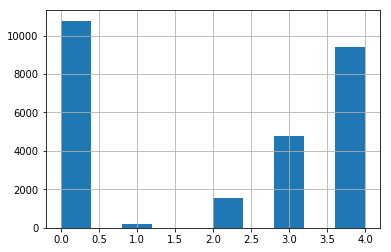

In [32]:
import matplotlib.pyplot as plt 
print(target_label.classes_)
pd.Series(y_train_label).hist()
plt.show()

Le modèle sélectionné est celui par arbre de décision (DecisionTreeClassifier). En observant la matrice de confusion obtenue pour ce modèle, on observe d'abord de bons résultats au niveau du classement des essais. Effectivement, c'est sur la diagonale de la matrice que l'on retrouve les plus gros nombres (représentant le nombre d'essais), ce qui signifie qu'ils ont été correctement identifiés. 

Il est également intéressant de regarder les proportions d'éléments mal classés pour chacune des catégories. 429 des 670 essais mal classés ont été identifiés dans la catégorie "Adoption", c'est-à-dire 64% des mauvaises identifications, ou 1,6% des essais totaux. 16 des 670 essais mal classés ont été identifiés dans la catégorie "Mort", soit 2,34% des mauvaises identifications, ou 0,06% des essais totaux. 65 des 670 essais mal classés ont été identifiés dans la catégorie "Euthanasie", soit 9,7% des mauvaises identifications, ou 0,24% des essais totaux. 84 des 670 essais mal classés ont été identifiés dans la catégorie "Retour au propriétaire", soit 12,54% des mauvaises identifications, ou 0,31% des essais totaux. 76 des 670 essais mal classés ont été identifiés dans la catégorie "Transfert", soit 11,34% des mauvaises identifications, ou 0,28% des essais totaux.

Or, on sait également que 40,29% des données devraient être classées en "Adoption", 0,74% en "Mort", 5,82% en "Euthanasie", 17,91% en "Retour au propritétaire", et 35,25% en "Transfert" si l'algorithme était parfait.

Il est alors possible de constater que l'algorithme performe généralement très bien, mais fait un peu plus d'erreurs pour certaines catégories. Par exemple, on pourrait s'attendre à ce que la proportion d'erreur pour chaque classe soit semblable à la distribution réelle des classes. Or, la proportion d'erreur pour la classe "Adoption" est plus grande que la proportion réelle de données qui appartienne à cette classe. L'algorithme a alors tendance à mal classer des données dans cette catégorie plus que dans les autres catégories. Ce problème peut être expliqué par le traitement de données effectué. L'arbre de décision effectue des décisions à la chaîne, un feature à la fois, avec les features qu'il considère comme les plus importants en premier. Or, si certains features considérés importants "favorisent" le classement dans "Adoption", on retrouvera alors une plus grande proportion d'éléments faussement classés dans cette catégorie.

La performance du DecisionTreeClassifier demeure toutefois excellente. Cela peut être expliquée par la manière dont les données ont été traitées. Effectivement, la majorité du traitement de données consiste à faire du one-hot encoding plutôt que de calculer des valeurs décimales complexes. Or, ce type d'information d'entrée est plus appropriée pour une arbre de décision, car ce-dernier effectue un choix à chaque étage de l'arbre, c'est-à-dire pour chaque feature. Or, il est plus facile d'effectuer un choix sur une valeur binaire que sur une valeur numérique. C'est aussi une opération beaucoup plus rapide, ce qui explique l'excellent temps d'exécution de cet algorithme.



## Bonus 3: Hyper-parameters optimization (1 point)

Hyper-parameters are the parameters set before the learning phase. To optimize the performance of the model, we can select the best hyper-parameters.

Using sklearn, optimize the hyper-parameters of the model you have selected and show that the performance has been improved.
For example, you can use: **GridSearchCV**


Finally, make the prediction on the test set and give your results when submitting the lab.

**Optional**: You can submit your results on kaggle and note your performance in terms of log loss.

Il nous a été impossible de trouver des paramètres permettant d'améliorer la performance du DecisionTreeClassifier. Toutefois, un exemple du code à utiliser afin d'optimiser les paramètres a été ajouté en commentaire à la fin du document "main.py" pour référence.